## [ক্রস ভ্যালিডেশনের প্যারামিটারের টিউনিং, মডেল সিলেকশন](https://github.com/hamidhosen42/ml-python/blob/master/cross-validation.ipynb)

### অ্যাক্যুরেসি বাড়ানোর জন্য "কে ফোল্ড" ক্রস ভ্যালিডেশন

মডেল ইভ্যালুয়েশনে "ট্রেইন/টেস্ট স্প্লিট" দেখেছি আগের চ্যাপ্টারে। এখানে এই স্প্লিটে বেশি 'আউট অফ স্যাম্পল' ডেটার জন্য 'ভ্যারিয়েন্স' এস্টিমেট অনেক বেশি হতে পারে। কারণ কোন অবজারভেশনগুলো টেস্ট সেটে যাবে সেটা অনেক সময় আমাদের হাতে থাকে না। আর সেকারণে সেটার আউটকাম টেস্টিং অ্যাক্যুরেসিতে পড়তে পারে। আর আপনি যা করছেন সেটা একবার করছেন। একটা ছোট ডেটাসেটের আলাদা একটা টেস্টসেট তৈরি করতে গিয়ে ট্রেনিং ডেটাসেট কমে যায়।

সেকারণে আমরা এখন চেষ্টা করবো নতুন একটা কনসেপ্ট, "কে ফোল্ড" ক্রস ভ্যালিডেশন। "কে ফোল্ড" অর্থ হচ্ছে ডেটাসেটকে কতোবার আমরা "কে" সংখ্যক একই ভাগে ভাগ করবো।

### শুরুতেই লোড করে নেই আগের ডেটাসেট এবং দরকারি মডিউল

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import metrics

In [2]:
iris=load_iris()

In [3]:
X=iris.data
y=iris.target

### "কে ফোল্ড" ক্রস ভ্যালিডেশন করার কিছু স্টেপস¶

1. শুরুতেই আমাদের নতুন এই টুল পুরো ডেটাসেটকে ভাগ করবে সমান সাইজের পার্টিশনে। এই পার্টিশনগুলো হচ্ছে ফোল্ড, কয়টা ফোল্ড করতে চাই আমরা?

2. নিচের ছবিটা দেখুন। পুরো ডেটাকে পাঁচ ভাগে ভাগ করেছে এই টুল। এখানে সবচেয়ে ডানের পার্টিশন মানে ফোল্ডকে সে ডিক্লেয়ার করেছে টেস্ট সেট হিসেবে। বাকি চার ভাগ ট্রেনিং সেট। ট্রেনিং সেট সবসময় টেস্ট সেট থেকে বড় রাখতে হয়।

3. এরপর সেটা বের করবে "টেস্টিং অ্যাক্যুরেসি"। সাধারণ সিস্টেমে যেভাবে আগে কাজ করেছি সেভাবে।

4. ২য় এবং ৩য় স্টেপগুলো বার বার করতে থাকবো যতক্ষণ পর্যন্ত একেকটা ফোল্ডকে একেকবার টেস্ট সেট হিসেবে ব্যবহার করে শেষ করে ফেলবো। এটা যদি "৫ ফোল্ড" ক্রস ভ্যালিডেশন হয়, এর মানে হচ্ছে পাঁচবার আলাদা করে টেস্ট সেট হিসেবে ধরে ট্রেনিং করে সেটার অ্যাক্যুরেসি সে মনে রাখবে। এগুলো আমরা খালি চোখে দেখবো না, এর সব কাজ হয়ে যাবে মডিউলের ভেতরে।

5. এই সবগুলোর "টেস্টিং অ্যাক্যুরেসি"কে গড় করে সেটাকে আমরা "আউট অফ স্যাম্পল" এর এস্টিমেট ধারণা করতে পারি।

### "৫ ফোল্ড" ক্রস ভ্যালিডেশন এর একটা ছবি¶

In [4]:
from IPython.display import Image
Image(url='cross validation parameters, model selection Image/cv.png')

In [5]:
# আমরা ২৫টা রেকর্ড নিয়ে সেটাকে ৫ ফোল্ডে ভাগ করে একটা সিমুলেশন দেখাই এখানে 

from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=False).split(range(25))

In [6]:
# প্রতিটা ট্রেনিং এবং টেস্ট সেট এর কনটেন্ট দেখি একটা একটা করে, সংখ্যাগুলো ডেটাসেটের একেকটা রেকর্ড  

print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


আপনাদের বোঝানোর জন্য ছোট একটা পঁচিশটা অবজারভেশনের ডেটাসেট দেখানো হচ্ছে এখানে। এর সাথে আইরিস ডেটাসেটের কোন সম্পর্ক নেই। এর অবজারভেশনগুলো হচ্ছে ০ থেকে ২৪ পর্যন্ত।

যেহেতু এটা একটা ৫ ফোল্ড ক্রস ভালিডেশন, সে কারণে এটার কিন্তু পাঁচটা ‘আইটারেশন’। একই জিনিস পাঁচবার আলাদা আলাদা করে চলবে।

প্রতিটা ‘আইটারেশনে’, আমাদের এক একটা রেকর্ড - হয় ট্রেনিং সেটে অথবা টেস্টিং সেটে থাকবে, কিন্তু দু'জায়গায় একসময়ে থাকবে না।

আবার টেস্টিং সেটে প্রতিটা অবজারভেশন একবারই আসবে, এর বেশি নয়।

### ক্রস ভ্যালিডেশনের কিছু বেস্ট প্রাক্টিসেস

1. আমাদের "কে" ফোল্ড অংশে "কে" এর সংখ্যা ইচ্ছেমতো হতে পারে তবে আমাদের রেকমেন্ডেশন হচ্ছে K=10।

2. ক্লাসিফিকেশন সমস্যায় সেখানে আমরা "স্ট্র্যাটিফাইড স্যাম্পলিং" ব্যবহার করবো ফোল্ড তৈরি করার জন্য। প্রতিটা রেসপন্স ক্লাস কিন্তু একই অনুপাতে আনতে হবে প্রতিটা "কে" ফোল্ডে। এটা একটা সমস্যা। তবে সাইকিট লার্নের cross_val_score ফাংশন জিনিসটা করে দেয় এমনিতেই। আর সেকারণে সাইকিট লার্নের এতো নাম ডাক।

### অ্যাক্যুরেসি বাড়াতে আইরিস ডেটাসেটের জন্য প্যারামিটার টিউনিং

অনেক গল্প শুনি আমরা "হাইপার-প্যারামিটার" টিউনিং নিয়ে। আইরিস ডেটাসেট নিয়ে "কে নিয়ারেস্ট নেইবার"এর সবচেয়ে ভালো টিউনিং প্যারামিটার কি হতে পারে?

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
# "কে নিয়ারেস্ট নেইবার" K=5, n_neighbors হচ্ছে প্যারামিটার + "কে ফোল্ড" ক্রস ভ্যালিডেশন এর cv=10

knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')

In [9]:
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
print(scores.mean())

0.9666666666666668


In [11]:
# "কে নিয়ারেস্ট নেইবার" কতো হলে মডেলটা অপটিমাইজড হয়? ১ থেকে ৩১ পর্যন্ত 
# এখানে "কে ফোল্ড" ক্রস ভ্যালিডেশন = ১০ মানে cv=10

k_range =list(range(1,31))
k_score=[]

for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_score.append(scores.mean())

print(k_score)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

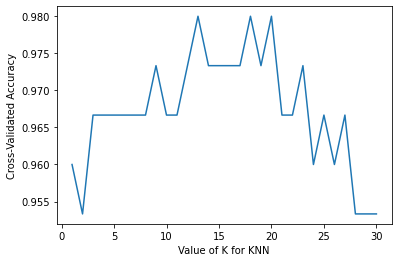

In [12]:
import matplotlib.pyplot as plt;

plt.plot(k_range,k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### "কে ফোল্ড" ক্রস ভ্যালিডেশন: মডেল বাছাই

আগের ছবিটা দেখুন। খালি চোখে "কে" এর মান ০.৯৮ দেখছি এক্স এক্সিসে ১৩, ১৮ এবং ২০এ। দেখি মডেলে ব্যবহার করে।

Goal:Compare the best KNN model with logistic regression on the iris dataset দুটো মডেল তুলনা করি এখানে। "কে নিয়ারেস্ট নেইবার" আর লজিস্টিক রিগ্রেশন, কোনটা ভালো? সঙ্গে n_neighbors=20 এবং cv=10।

In [13]:
# "কে নিয়ারেস্ট নেইবার" সঙ্গে ১০ "কে ফোল্ড" ক্রস ভ্যালিডেশন
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

C:\Users\Md.Hamid Hosen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Md.Hamid Hosen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

0.9733333333333334



দুটোর মধ্যে অ্যাক্যুরেসির বেশ ফারাক। এর মানে মডেল সিলেকশন একটা জরুরি বিষয় বটে